<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center> 


<a id='home'></a>
_____


# Transforming

Most of the time you need to transform the data you have prepared. I will show the main mathematical transformations that data goes through, namely, aggregating and re scaling.

Let me get a data set familiar to us:

In [1]:
import os, pandas as pd
fragcia=pd.read_csv(os.path.join("data","FragilityCia_isos.csv"))
fragcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            172 non-null    object 
 1   Officialstatename  172 non-null    object 
 2   InternetccTLD      172 non-null    object 
 3   iso2               171 non-null    object 
 4   iso3               172 non-null    object 
 5   fragility_date     172 non-null    int64  
 6   fragility          172 non-null    float64
 7   co2                172 non-null    float64
 8   co2_date           172 non-null    int64  
 9   region             172 non-null    object 
 10  ForestRev_gdp      172 non-null    float64
 11  ForestRev_date     172 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 16.3+ KB


## Aggregation

Sometimes, we need to reorganize the data by groups. One of those columns is the category that represents the group. In the previous table, region is an attribute of country; but we can turn the table from a table countries to a table of regions:

In [2]:
# sum of cases by estado
fragcia.groupby('region')[['fragility','co2','ForestRev_gdp']].agg('mean')

,fragility,co2,ForestRev_gdp
region,,,
AFRICA,85.664706,1.670835e+07,3.239804
AUSTRALIA AND OCEANIA,55.100000,7.679500e+07,3.630000
CENTRAL AMERICA AND THE CARIBBEAN,62.993750,1.104856e+07,0.359375
CENTRAL ASIA,72.883333,3.898807e+08,0.236667
EAST AND SOUTHEAST ASIA,66.006250,9.027721e+08,0.655625
EUROPE,40.348718,9.866674e+07,0.199231
MIDDLE EAST,71.756250,1.583754e+08,0.032500
NORTH AMERICA,42.566667,2.073395e+09,0.073333
SOUTH AMERICA,61.436364,8.613718e+07,1.064545


In [3]:
# more complex
fragciaAGG=fragcia.groupby('region')[['fragility','co2','ForestRev_gdp']].agg(['min','max'],)

fragciaAGG

fragility                 co2                \
                                        min    max          min           max   
region                                                                          
AFRICA                                 38.9  112.2     173000.0  2.351370e+08   
AUSTRALIA AND OCEANIA                  19.7   81.9     177000.0  4.178700e+08   
CENTRAL AMERICA AND THE CARIBBEAN      42.0   99.3     316000.0  3.965200e+07   
CENTRAL ASIA                           61.6   77.7    7643000.0  1.848070e+09   
EAST AND SOUTHEAST ASIA                28.1   94.3     538000.0  1.077325e+10   
EUROPE                                 16.9   71.3    2447000.0  7.268810e+08   
MIDDLE EAST                            40.1  113.5    6354000.0  6.460380e+08   
NORTH AMERICA                          20.0   69.7  463739000.0  5.144361e+09   
SOUTH AMERICA                          34.0   75.7    2372000.0  4.566700e+08   
SOUTH ASIA                             69.8  105.0     934000.0  2.314738e+09   

                                  ForestRev_gdp         
                                            min    max  
region                                                  
AFRICA                                     0.00  13.27  
AUSTRALIA AND OCEANIA                      0.02  20.27  
CENTRAL AMERICA AND THE CARIBBEAN          0.00   1.26  
CENTRAL ASIA                               0.00   1.12  
EAST AND SOUTHEAST ASIA                    0.00   2.08  
EUROPE                                     0.00   1.02  
MIDDLE EAST                                0.00   0.28  
NORTH AMERICA                              0.04   0.10  
SOUTH AMERICA                              0.09   4.56  
SOUTH ASIA                                 0.00   1.89

Notice that we have multi-index in the columns

In [4]:
fragciaAGG.columns

MultiIndex([(    'fragility', 'min'),
            (    'fragility', 'max'),
            (          'co2', 'min'),
            (          'co2', 'max'),
            ('ForestRev_gdp', 'min'),
            ('ForestRev_gdp', 'max')],
           )

Even though pandas can work well, when exporting files to another application, you may prefer just simple indexes. So, let me show you how to **flat** the indexes:

In [5]:
fragciaAGG.columns.to_flat_index()

Index([    ('fragility', 'min'),     ('fragility', 'max'),
                 ('co2', 'min'),           ('co2', 'max'),
       ('ForestRev_gdp', 'min'), ('ForestRev_gdp', 'max')],
      dtype='object')

Then,

In [6]:
fragciaAGG.columns=fragciaAGG.columns.to_flat_index()
fragciaAGG

,"(fragility, min)","(fragility, max)","(co2, min)","(co2, max)","(ForestRev_gdp, min)","(ForestRev_gdp, max)"
region,,,,,,
AFRICA,38.9,112.2,173000.0,2.351370e+08,0.00,13.27
AUSTRALIA AND OCEANIA,19.7,81.9,177000.0,4.178700e+08,0.02,20.27
CENTRAL AMERICA AND THE CARIBBEAN,42.0,99.3,316000.0,3.965200e+07,0.00,1.26
CENTRAL ASIA,61.6,77.7,7643000.0,1.848070e+09,0.00,1.12
EAST AND SOUTHEAST ASIA,28.1,94.3,538000.0,1.077325e+10,0.00,2.08
EUROPE,16.9,71.3,2447000.0,7.268810e+08,0.00,1.02
MIDDLE EAST,40.1,113.5,6354000.0,6.460380e+08,0.00,0.28
NORTH AMERICA,20.0,69.7,463739000.0,5.144361e+09,0.04,0.10
SOUTH AMERICA,34.0,75.7,2372000.0,4.566700e+08,0.09,4.56


Now you have tuples as column names!... we solve it like this:

In [7]:
['_'.join(col) for col in fragciaAGG.columns]

['fragility_min',
 'fragility_max',
 'co2_min',
 'co2_max',
 'ForestRev_gdp_min',
 'ForestRev_gdp_max']

So,

In [8]:
fragciaAGG.columns=['_'.join(col) for col in fragciaAGG.columns]
fragciaAGG

,fragility_min,fragility_max,co2_min,co2_max,ForestRev_gdp_min,ForestRev_gdp_max
region,,,,,,
AFRICA,38.9,112.2,173000.0,2.351370e+08,0.00,13.27
AUSTRALIA AND OCEANIA,19.7,81.9,177000.0,4.178700e+08,0.02,20.27
CENTRAL AMERICA AND THE CARIBBEAN,42.0,99.3,316000.0,3.965200e+07,0.00,1.26
CENTRAL ASIA,61.6,77.7,7643000.0,1.848070e+09,0.00,1.12
EAST AND SOUTHEAST ASIA,28.1,94.3,538000.0,1.077325e+10,0.00,2.08
EUROPE,16.9,71.3,2447000.0,7.268810e+08,0.00,1.02
MIDDLE EAST,40.1,113.5,6354000.0,6.460380e+08,0.00,0.28
NORTH AMERICA,20.0,69.7,463739000.0,5.144361e+09,0.04,0.10
SOUTH AMERICA,34.0,75.7,2372000.0,4.566700e+08,0.09,4.56


The last step would be to have _region_ as a column, not as the row index:

In [9]:
fragciaAGG.reset_index(inplace=True) #you don't drop it!!
fragciaAGG

,region,fragility_min,fragility_max,co2_min,co2_max,ForestRev_gdp_min,ForestRev_gdp_max
0,AFRICA,38.9,112.2,173000.0,2.351370e+08,0.00,13.27
1,AUSTRALIA AND OCEANIA,19.7,81.9,177000.0,4.178700e+08,0.02,20.27
2,CENTRAL AMERICA AND THE CARIBBEAN,42.0,99.3,316000.0,3.965200e+07,0.00,1.26
3,CENTRAL ASIA,61.6,77.7,7643000.0,1.848070e+09,0.00,1.12
4,EAST AND SOUTHEAST ASIA,28.1,94.3,538000.0,1.077325e+10,0.00,2.08
5,EUROPE,16.9,71.3,2447000.0,7.268810e+08,0.00,1.02
6,MIDDLE EAST,40.1,113.5,6354000.0,6.460380e+08,0.00,0.28
7,NORTH AMERICA,20.0,69.7,463739000.0,5.144361e+09,0.04,0.10
8,SOUTH AMERICA,34.0,75.7,2372000.0,4.566700e+08,0.09,4.56
9,SOUTH ASIA,69.8,105.0,934000.0,2.314738e+09,0.00,1.89


## Spatial aggregation


We can do similar aggregations once the data is in a map. Let me open what we have:

In [29]:
import os, geopandas as gpd
mapWorld=gpd.read_file(os.path.join("maps","world-administrative-boundaries.geojson"))
mapWorld.shape

(256, 10)

<Axes: >

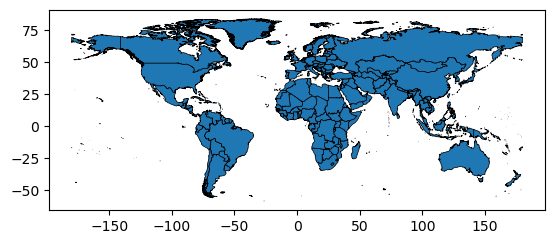

In [20]:
mapWorld.plot(linewidth=0.5, edgecolor='k')

We can aggregate geometries by **dissolving**:

<Axes: >

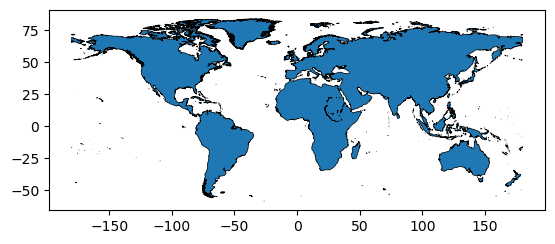

In [21]:
mapWorld.dissolve().plot(linewidth=0.5, edgecolor='k')

Let's merge:

In [23]:
mapWorld.columns

Index(['geo_point_2d', 'iso3', 'status', 'color_code', 'name', 'continent',
       'region', 'iso_3166_1_alpha_2_codes', 'french_short', 'geometry'],
      dtype='object')

In [24]:
import os, pandas as pd
fragcia=pd.read_csv(os.path.join("data","FragilityCia_isos.csv"))
fragcia.columns

Index(['Country', 'Officialstatename', 'InternetccTLD', 'iso2', 'iso3',
       'fragility_date', 'fragility', 'co2', 'co2_date', 'region',
       'ForestRev_gdp', 'ForestRev_date'],
      dtype='object')

Then:

In [30]:
mapWorld=mapWorld.merge(fragcia,on='iso3')

In [34]:
mapWorld.columns

Index(['geo_point_2d', 'iso3', 'status', 'color_code', 'name', 'continent',
       'region_x', 'iso_3166_1_alpha_2_codes', 'french_short', 'geometry',
       'Country', 'Officialstatename', 'InternetccTLD', 'iso2',
       'fragility_date', 'fragility', 'co2', 'co2_date', 'region_y',
       'ForestRev_gdp', 'ForestRev_date'],
      dtype='object')

In [44]:
cv=lambda x:x.std()/x.mean() # custom function

someCols=['fragility','co2','ForestRev_gdp','continent','geometry']

mapAgg=mapWorld.loc[:,someCols].dissolve(by='continent',aggfunc={'co2':['mean',cv]})

mapAgg

,geometry,"(co2, mean)","(co2, <lambda_0>)"
continent,,,
Africa,"MULTIPOLYGON (((-3.14861 5.09583, -3.16833 5.1...",1.670835e+07,2.441178
Americas,"MULTIPOLYGON (((-155.53927 19.10347, -155.5511...",2.448157e+08,3.832171
Asia,"MULTIPOLYGON (((73.10124 0.22917, 73.10679 0.2...",4.470812e+08,3.630395
Europe,"MULTIPOLYGON (((-18.14611 27.76944, -18.13223 ...",1.434605e+08,2.182032
Oceania,"MULTIPOLYGON (((-176.35194 -43.79056, -176.361...",6.675157e+07,2.329664


In [42]:
# column names
mapAgg.columns

Index(['geometry', ('co2', 'mean'), ('co2', '<lambda_0>')], dtype='object')

See the map colored by a column:

/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

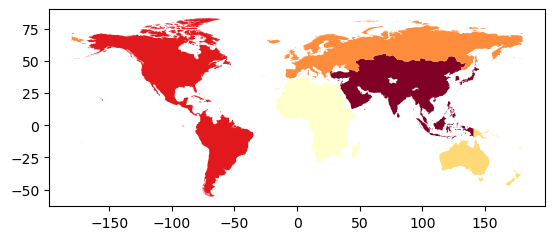

In [47]:
mapAgg.plot(column =('co2', 'mean'), scheme='quantiles', cmap='YlOrRd')

## Re Scaling

Different columns have different value ranges. That is normal. However, some time, you need to manipulate the actual values so they have a particular scale or range. Let's see statistical summary:

In [ ]:
fragcia.describe(include='all')

The **describe** will only show numerical stats by default, so you need the parameter _include_ set to *all*. However, for our case, we should just request the range:

In [ ]:
fragcia.describe().loc[['min','max']].T # notice the transposing:

A boxplot may also be helpful:

In [ ]:
import matplotlib.pyplot as plt

fragcia.plot(kind='box', rot=90);

In [ ]:
#alternatively

fragcia.plot(kind='box', rot=90)
plt.semilogy();

As you see above, the ranges are very different (except the years).  Let's do some re scaling.

## Min-Max Scaling

In [ ]:
columnsToScale=['fragility','co2','ForestRev_gdp'] 

from sklearn import preprocessing #installed?

# prepare the process
mnMx_Scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))# default is 0,1

# apply process
mnMx_Result = mnMx_Scaler.fit_transform(fragcia[columnsToScale])

# result
mnMx_Result

## Standard Scaling

In thi case, we will turn the data unitless. Their mean will be 0 and their standard deviation will be one:

In [ ]:
# prepare the process
std_Scaler = preprocessing.StandardScaler()

# apply process
std_Result = std_Scaler.fit_transform(fragcia[columnsToScale])

# result
std_Result

You just got:

In [ ]:
type(mnMx_Result), type(std_Result)

Let's prepare the new columns:

In [ ]:
newNames_mM=[name+'_mM' for name in columnsToScale]
newNames_sd=[name+'_sd' for name in columnsToScale]
newNames_mM,newNames_sd

Let me use that array to replace my values in the pandas _Series_:

In [ ]:
mMDF=pd.DataFrame(mnMx_Result,columns=newNames_mM)
stDF=pd.DataFrame(std_Result,columns=newNames_sd)

In [ ]:
fragcia=pd.concat([fragcia,mMDF,stDF],axis=1)

fragcia.info()

Now, these are my new data values:

In [ ]:
fragcia[newNames_mM].plot(kind='box', rot=90);

In [ ]:
fragcia[newNames_sd].plot(kind='box', rot=90);

The data is ready to be exported.


[Home](#home)


______

<a id='exporting'></a>


# Exporting file

The current *fragcia* data frame is clean and formatted. It is time to send it to a format that will keep all our work for future use.

#### For future use in Python:

In [ ]:
fragcia.to_csv(os.path.join("data","fragcia.csv"))

#### For future  use in R:

In [ ]:
#try the following before starting Python:
#export LD_LIBRARY_PATH="$(python -m rpy2.situation LD_LIBRARY_PATH)":${LD_LIBRARY_PATH}

from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(fragcia,file="fragcia.RDS")


#In R, you call it with: DF = readRDS("fragcia.RDS")
#or, if iyou read from cloud: DF = readRDS(url("https://..../fragcia.RDS")